In [1]:
from pathlib import Path
import pandas as pd

# This is much cleaner and avoids all syntax errors
file_path = Path("C:/Users\jains\Downloads\Crop_production_final.csv")
df = pd.read_csv(file_path)
print(df.head())

       State_Name Crop_Type       Crop    N   P   K    pH  rainfall  \
0  andhra pradesh    kharif     cotton  120  40  20  5.46    654.34   
1  andhra pradesh    kharif  horsegram   20  60  20  6.18    654.34   
2  andhra pradesh    kharif      jowar   80  40  40  5.42    654.34   
3  andhra pradesh    kharif      maize   80  40  20  5.62    654.34   
4  andhra pradesh    kharif      moong   20  40  20  5.68    654.34   

   temperature  Area_in_hectares  Production_in_tons  Yield_ton_per_hec  
0    29.266667            7300.0              9400.0           1.287671  
1    29.266667            3300.0              1000.0           0.303030  
2    29.266667           10100.0             10200.0           1.009901  
3    29.266667            2800.0              4900.0           1.750000  
4    29.266667            1300.0               500.0           0.384615  


In [2]:
print(df.shape)
df_clean = df[(df['Yield_ton_per_hec'] < 100)& (df['Area_in_hectares'] >0.2) ].copy()
df_clean.shape
print(df.shape)
df_clean.drop(['Production_in_tons','Area_in_hectares'], axis=1, inplace=True)
print(df_clean.shape)
df_clean.head()

(96133, 12)
(96133, 12)
(96125, 10)


,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Yield_ton_per_hec
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,1.287671
1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,0.303030
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,1.009901
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,1.750000
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,0.384615


In [3]:
# 1. Get the counts of all unique crops
crop_counts = df_clean['Crop'].value_counts()

# 2. Print the total number of unique crops found
print(f"Total Unique Crops: {len(crop_counts)}\n")

# 3. Print the detailed list
print("Crop Name".ljust(15), "Occurrences")
print("-" * 30)
for crop, count in crop_counts.items():
    print(f"{crop.ljust(15)} {count}")

Total Unique Crops: 25

Crop Name       Occurrences
------------------------------
rice            11426
maize           9800
moong           6808
sesamum         6232
wheat           6077
rapeseed        5380
jowar           5344
onion           5158
potato          5143
sunflower       3672
cotton          3124
barley          3106
ragi            2993
sweetpotato     2891
horsegram       2775
turmeric        2459
banana          2389
soyabean        2319
coriander       2253
garlic          2131
arecanut        1154
tapioca         1133
jute            1058
cashewnuts      729
blackpepper     571


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Define the Hardcoded Groups
# We've isolated the 'Mega-Crops' and tiered the rest by their visual yield spread
crop_groups = {
    "Maize_Specialist": ['maize'],
    "Cotton_Specialist": ['cotton'],
    "Tier_1_Heavyweight": ['banana', 'sugarcane', 'tapioca'],
    "Tier_2_Mid_High": ['potato', 'onion', 'sweetpotato', 'garlic', 'turmeric'],
    "Tier_3_Stable": ['wheat', 'rice', 'barley', 'jowar', 'ragi', 'arecanut'],
    "Tier_4_Low_Density": ['moong', 'sesamum', 'rapeseed', 'soyabean', 'horsegram', 
                           'sunflower', 'coriander', 'cashewnuts', 'blackpepper']
}

# 2. Dictionary to store the 6 DataFrames
specialist_dfs = {}

# 3. Filter and extract
for group_name, crops in crop_groups.items():
    # .str.lower().isin() ensures we catch 'Maize', 'maize', or 'MAIZE'
    specialist_dfs[group_name] = df_clean[df_clean['Crop'].str.lower().isin(crops)].copy()
    print(f"{group_name}: {len(specialist_dfs[group_name])} rows")

# 4. Access individual DFs easily for training
df_maize = specialist_dfs["Maize_Specialist"]
df_cotton = specialist_dfs["Cotton_Specialist"]
df_heavy = specialist_dfs["Tier_1_Heavyweight"]
df_mid = specialist_dfs["Tier_2_Mid_High"]
df_stable = specialist_dfs["Tier_3_Stable"]
df_low = specialist_dfs["Tier_4_Low_Density"]

Maize_Specialist: 9800 rows
Cotton_Specialist: 3124 rows
Tier_1_Heavyweight: 3522 rows
Tier_2_Mid_High: 17782 rows
Tier_3_Stable: 30100 rows
Tier_4_Low_Density: 30739 rows


C:\Users\jains\AppData\Local\Temp\ipykernel_39032\2596814831.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\jains\AppData\Local\Temp\ipykernel_39032\2596814831.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\jains\AppData\Local\Temp\ipykernel_39032\2596814831.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\jains\AppData\Local\Temp\ipykernel_39032\2596814831.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

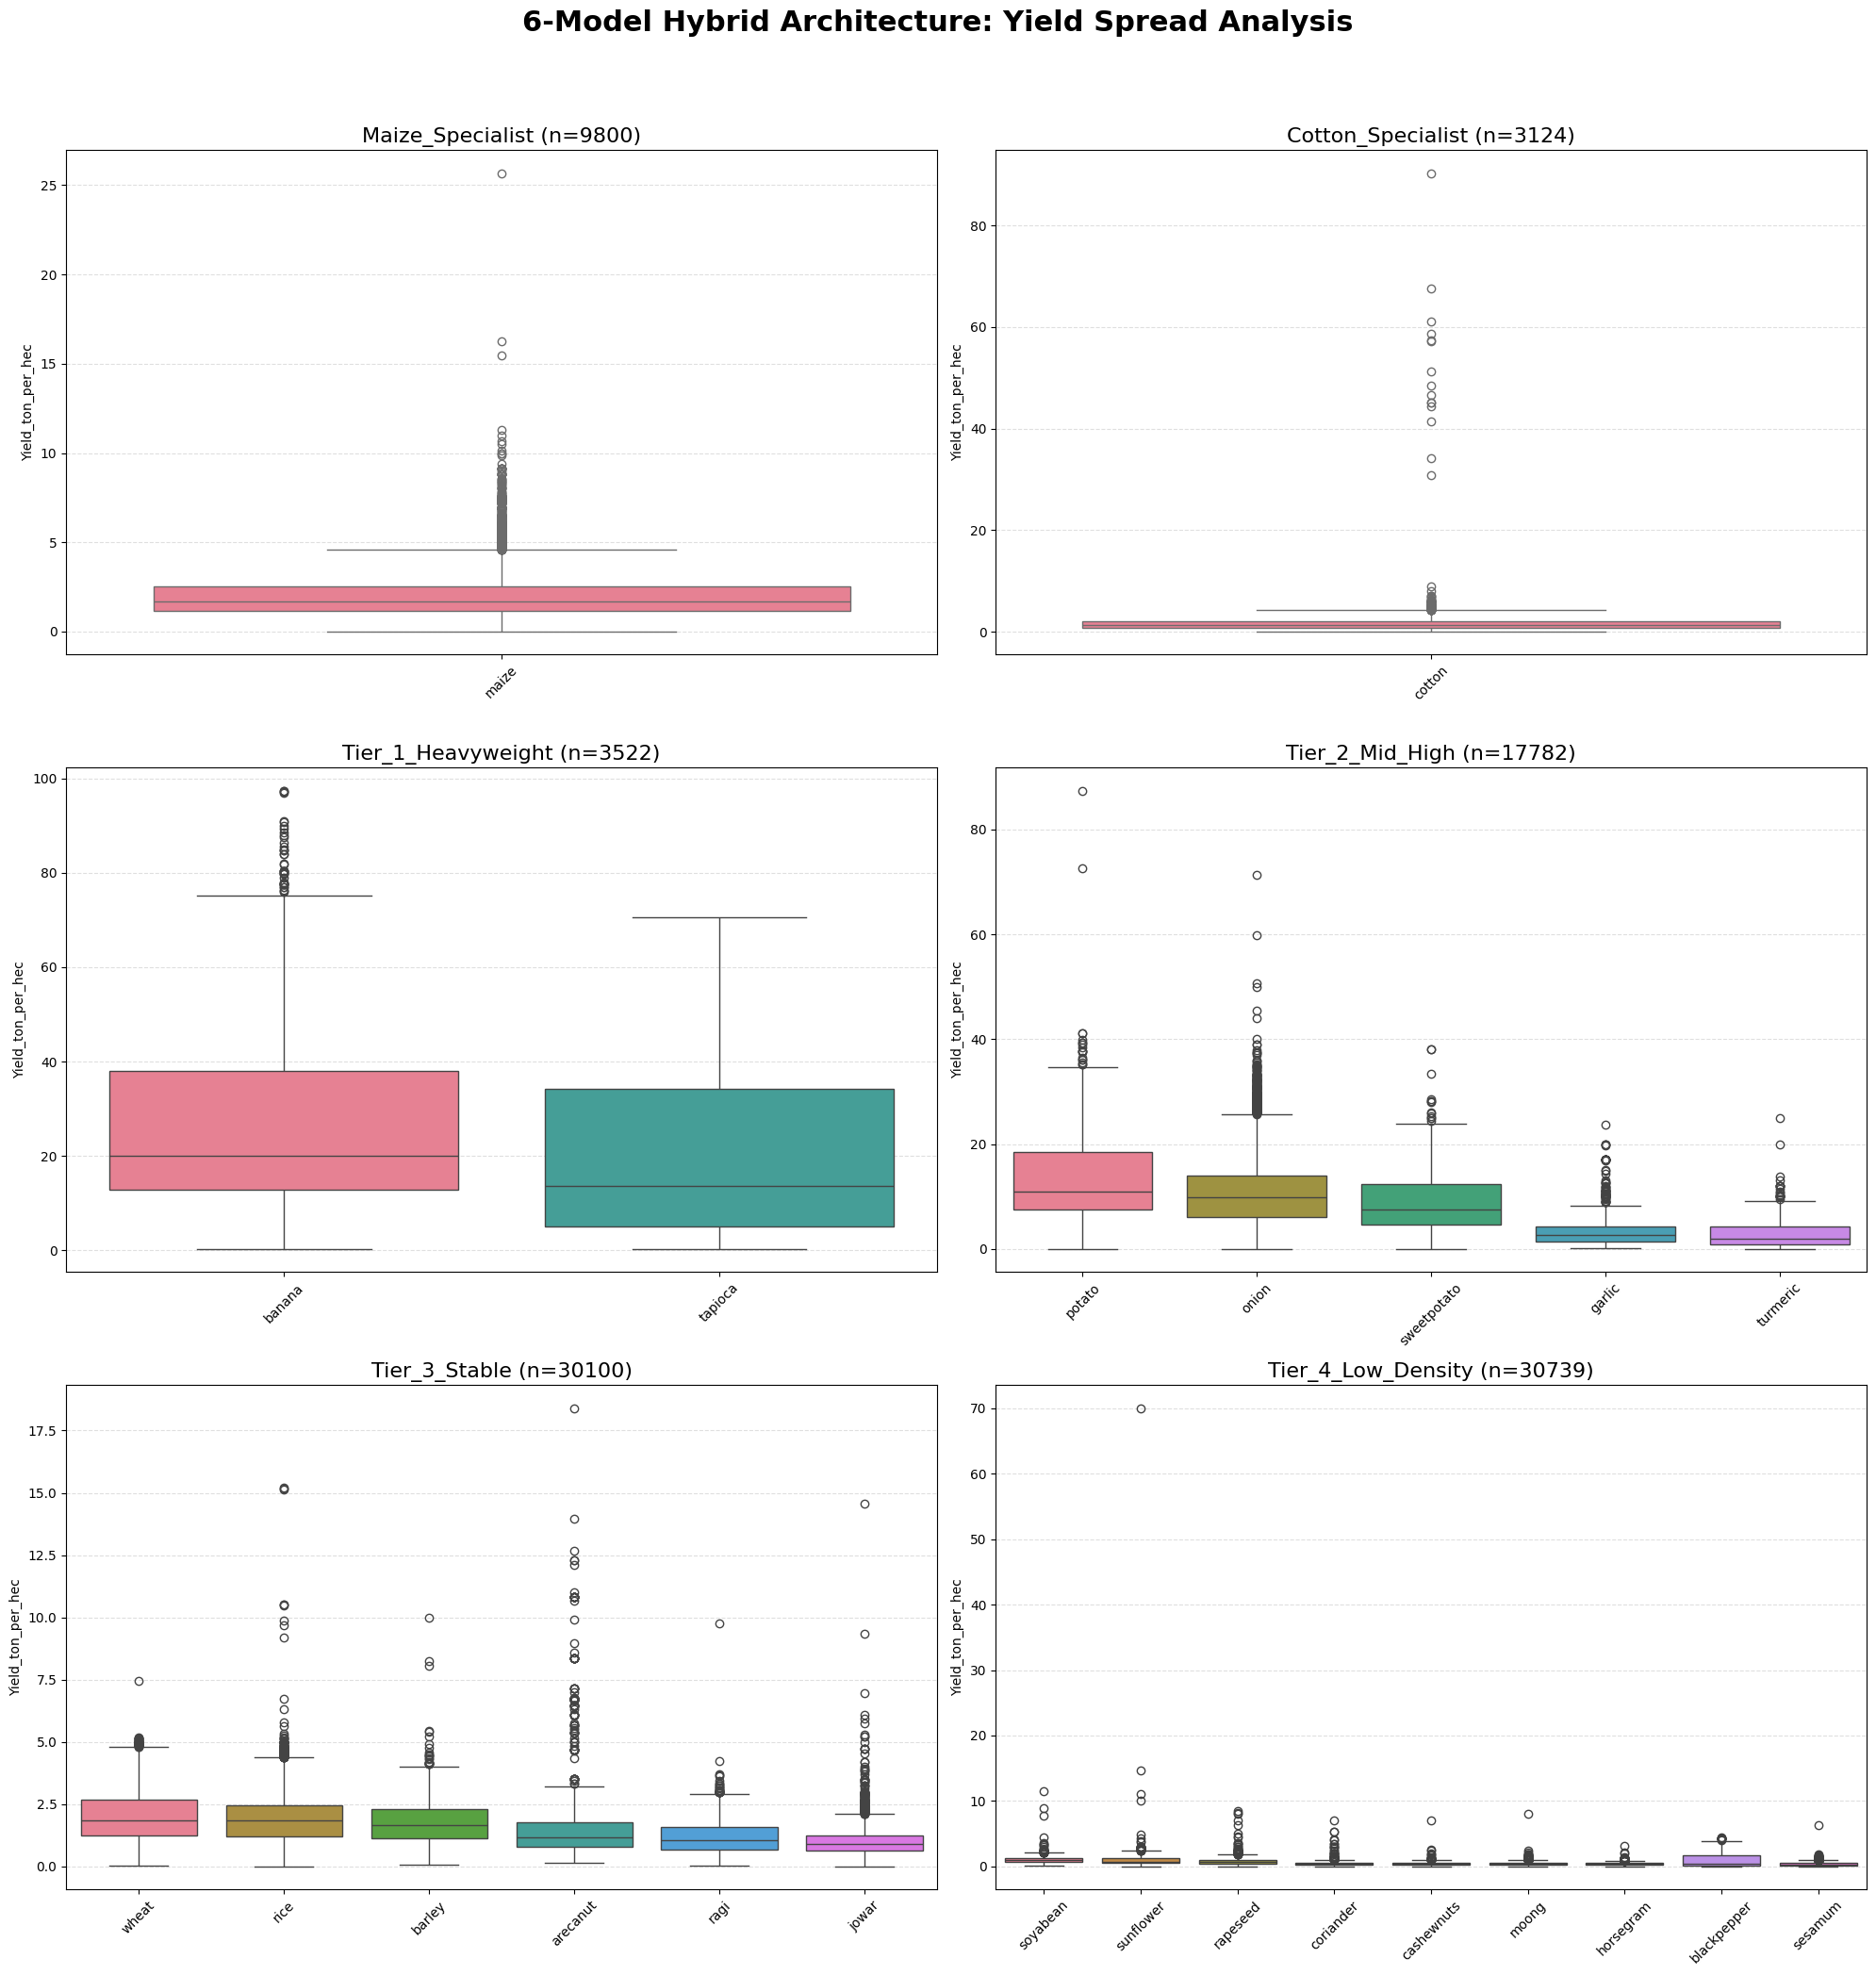

In [5]:
# Setup a 3-row, 2-column grid to fit all 6 models
fig, axes = plt.subplots(3, 2, figsize=(20, 22))
fig.suptitle('6-Model Hybrid Architecture: Yield Spread Analysis', fontsize=22, fontweight='bold')

# Flatten axes for easy looping
ax_flat = axes.flatten()

for i, (name, df) in enumerate(specialist_dfs.items()):
    if df.empty: continue
    
    # Sort crops by median yield within the group
    order = df.groupby('Crop')['Yield_ton_per_hec'].median().sort_values(ascending=False).index
    
    sns.boxplot(
        x='Crop', 
        y='Yield_ton_per_hec', 
        data=df, 
        ax=ax_flat[i], 
        order=order,
        palette='husl'
    )
    
    ax_flat[i].set_title(f'{name} (n={len(df)})', fontsize=16)
    ax_flat[i].tick_params(axis='x', rotation=45)
    ax_flat[i].set_xlabel('')
    ax_flat[i].grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

# Dictionary to store all our split data
all_splits = {}

for name, df_spec in specialist_dfs.items():
    # 1. Separate Features and Target
    X = df_spec.drop('Yield_ton_per_hec', axis=1)
    y = df_spec['Yield_ton_per_hec']
    
    # 2. Perform the split (20% test, 80% train)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # 3. Store the split in our dictionary
    all_splits[name] = {
        "X_train": X_train, "X_test": X_test, 
        "y_train": y_train, "y_test": y_test
    }
    
    # 4. Print Verification
    print(f"--- {name} ---")
    print(f"Total: {len(df_spec)} | Train: {len(X_train)} | Test: {len(X_test)}")

--- Maize_Specialist ---
Total: 9800 | Train: 7840 | Test: 1960
--- Cotton_Specialist ---
Total: 3124 | Train: 2499 | Test: 625
--- Tier_1_Heavyweight ---
Total: 3522 | Train: 2817 | Test: 705
--- Tier_2_Mid_High ---
Total: 17782 | Train: 14225 | Test: 3557
--- Tier_3_Stable ---
Total: 30100 | Train: 24080 | Test: 6020
--- Tier_4_Low_Density ---
Total: 30739 | Train: 24591 | Test: 6148


In [18]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

# 1. Define the Transformers
# FunctionTransformer for the extreme right-skew (Rainfall & Area)
log_transformer = FunctionTransformer(np.log1p, validate=True)

# PowerTransformer with Yeo-Johnson for multimodal/spiky data (N, P, K)
# This helps normalize those 'spikes' we saw in your histograms
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

# Standard scaler for the variables that are already fairly normal (pH, temperature)
scaler = StandardScaler()

# OrdinalEncoder for categorical variables
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# 2. Build the ColumnTransformer
# This is the "brain" that applies the right math to the right columns
preprocessor = ColumnTransformer(
    transformers=[
        ('log_group', log_transformer, ['rainfall']),
        ('power_group', power_transformer, ['N', 'P', 'K']),
        ('scale_group', scaler, ['pH', 'temperature']),
        ('cat_group', encoder, ['State_Name', 'Crop_Type', 'Crop'])
    ],
    remainder='passthrough'  # Keeps any other columns as they are
)


In [19]:
import optuna
import joblib
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.base import clone # Important for duplicating the preprocessor

# 1. Master Dictionary for the winners
best_params_master = {}

# 2. Objective Function (unchanged, but optimized)
def objective(trial, X_tr, y_tr, X_te, y_te, name):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        # Student Tip: Smaller groups (Maize/Cotton) need shallower trees
        'max_depth': trial.suggest_int('max_depth', 3, 6 if "Specialist" in name else 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42,
        'n_jobs': -1
    }
    model = XGBRegressor(**param)
    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    return mean_absolute_error(y_te, preds)

# 3. The Corrected Automation Loop
for target_group, group_data in all_splits.items():
    print(f"\n🚀 STARTING OPTUNA FOR: {target_group}")
    
    # FIX: Clone the preprocessor so it 'forgets' the previous group's statistics
    # This ensures Maize scaling doesn't affect Cotton scaling
    group_preprocessor = clone(preprocessor)
    
    # Transform specifically for this group's range
    X_train_opt = group_preprocessor.fit_transform(group_data['X_train'])
    X_test_opt = group_preprocessor.transform(group_data['X_test'])
    
    # Create study
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: objective(trial, X_train_opt, group_data['y_train'], 
                                           X_test_opt, group_data['y_test'], target_group), 
                   n_trials=35)
    
    # Store results
    best_params_master[target_group] = study.best_params
    print(f"✅ Best MAE for {target_group}: {study.best_value:.4f}")

# 4. Save the params so you don't lose the hard work!
joblib.dump(best_params_master, "best_specialist_params.pkl")

[I 2026-02-14 06:16:10,430] A new study created in memory with name: no-name-77e539e1-7ded-4ccb-920d-7b7045071895



🚀 STARTING OPTUNA FOR: Maize_Specialist


[I 2026-02-14 06:16:11,012] Trial 0 finished with value: 0.5660993925849291 and parameters: {'n_estimators': 777, 'learning_rate': 0.020646882655111144, 'max_depth': 6, 'subsample': 0.8872129809084743, 'colsample_bytree': 0.9553128398840093, 'min_child_weight': 5}. Best is trial 0 with value: 0.5660993925849291.
[I 2026-02-14 06:16:11,232] Trial 1 finished with value: 0.5558499586743918 and parameters: {'n_estimators': 594, 'learning_rate': 0.03820468890587265, 'max_depth': 3, 'subsample': 0.863041060085999, 'colsample_bytree': 0.9276311372211552, 'min_child_weight': 3}. Best is trial 1 with value: 0.5558499586743918.
[I 2026-02-14 06:16:11,411] Trial 2 finished with value: 0.561047514573037 and parameters: {'n_estimators': 511, 'learning_rate': 0.0406654438598092, 'max_depth': 5, 'subsample': 0.8195009425177655, 'colsample_bytree': 0.8420533654674154, 'min_child_weight': 9}. Best is trial 1 with value: 0.5558499586743918.
[I 2026-02-14 06:16:11,638] Trial 3 finished with value: 0.5570

✅ Best MAE for Maize_Specialist: 0.5523

🚀 STARTING OPTUNA FOR: Cotton_Specialist


[I 2026-02-14 06:16:16,712] Trial 2 finished with value: 1.1927802751457501 and parameters: {'n_estimators': 434, 'learning_rate': 0.015879092733520065, 'max_depth': 6, 'subsample': 0.759905152807123, 'colsample_bytree': 0.9827517073089955, 'min_child_weight': 2}. Best is trial 2 with value: 1.1927802751457501.
[I 2026-02-14 06:16:16,734] Trial 3 finished with value: 1.1695629816026571 and parameters: {'n_estimators': 102, 'learning_rate': 0.03663227630003336, 'max_depth': 3, 'subsample': 0.9625405735236017, 'colsample_bytree': 0.927821399722306, 'min_child_weight': 8}. Best is trial 3 with value: 1.1695629816026571.
[I 2026-02-14 06:16:16,810] Trial 4 finished with value: 1.1673330406385343 and parameters: {'n_estimators': 372, 'learning_rate': 0.013521386974875529, 'max_depth': 3, 'subsample': 0.6394906713890148, 'colsample_bytree': 0.7537626727600122, 'min_child_weight': 4}. Best is trial 4 with value: 1.1673330406385343.
[I 2026-02-14 06:16:16,884] Trial 5 finished with value: 1.20

✅ Best MAE for Cotton_Specialist: 1.1668

🚀 STARTING OPTUNA FOR: Tier_1_Heavyweight


[I 2026-02-14 06:16:19,958] Trial 0 finished with value: 6.1689839510638915 and parameters: {'n_estimators': 432, 'learning_rate': 0.06394354045303333, 'max_depth': 8, 'subsample': 0.6069994612419548, 'colsample_bytree': 0.9827776636818109, 'min_child_weight': 3}. Best is trial 0 with value: 6.1689839510638915.
[I 2026-02-14 06:16:20,249] Trial 1 finished with value: 5.945166733997808 and parameters: {'n_estimators': 609, 'learning_rate': 0.020402930001855602, 'max_depth': 7, 'subsample': 0.7542318393795386, 'colsample_bytree': 0.8412650151911463, 'min_child_weight': 5}. Best is trial 1 with value: 5.945166733997808.
[I 2026-02-14 06:16:20,974] Trial 2 finished with value: 6.211197549030091 and parameters: {'n_estimators': 942, 'learning_rate': 0.03479393085659922, 'max_depth': 10, 'subsample': 0.9504544228723982, 'colsample_bytree': 0.9738200873419618, 'min_child_weight': 4}. Best is trial 1 with value: 5.945166733997808.
[I 2026-02-14 06:16:21,303] Trial 3 finished with value: 6.2119

✅ Best MAE for Tier_1_Heavyweight: 5.6764

🚀 STARTING OPTUNA FOR: Tier_2_Mid_High


[I 2026-02-14 06:16:26,319] Trial 0 finished with value: 2.120285283855713 and parameters: {'n_estimators': 402, 'learning_rate': 0.018016850086808874, 'max_depth': 6, 'subsample': 0.6689744914036465, 'colsample_bytree': 0.606722014319364, 'min_child_weight': 5}. Best is trial 0 with value: 2.120285283855713.
[I 2026-02-14 06:16:27,459] Trial 1 finished with value: 2.222687461260292 and parameters: {'n_estimators': 960, 'learning_rate': 0.07763203890937234, 'max_depth': 9, 'subsample': 0.825132046434131, 'colsample_bytree': 0.8634304479345056, 'min_child_weight': 10}. Best is trial 0 with value: 2.120285283855713.
[I 2026-02-14 06:16:27,966] Trial 2 finished with value: 2.172773929969753 and parameters: {'n_estimators': 402, 'learning_rate': 0.040966800641365236, 'max_depth': 10, 'subsample': 0.7961533924280518, 'colsample_bytree': 0.6900649805904365, 'min_child_weight': 8}. Best is trial 0 with value: 2.120285283855713.
[I 2026-02-14 06:16:28,366] Trial 3 finished with value: 2.201464

✅ Best MAE for Tier_2_Mid_High: 2.1091

🚀 STARTING OPTUNA FOR: Tier_3_Stable


[I 2026-02-14 06:16:38,161] Trial 0 finished with value: 0.41942388612398745 and parameters: {'n_estimators': 575, 'learning_rate': 0.016539281105794276, 'max_depth': 7, 'subsample': 0.9589027470099251, 'colsample_bytree': 0.7564583162206364, 'min_child_weight': 10}. Best is trial 0 with value: 0.41942388612398745.
[I 2026-02-14 06:16:38,405] Trial 1 finished with value: 0.44430793567225996 and parameters: {'n_estimators': 479, 'learning_rate': 0.014468961388609916, 'max_depth': 4, 'subsample': 0.8281238207140375, 'colsample_bytree': 0.799673744536436, 'min_child_weight': 8}. Best is trial 0 with value: 0.41942388612398745.
[I 2026-02-14 06:16:39,289] Trial 2 finished with value: 0.42744198387005905 and parameters: {'n_estimators': 620, 'learning_rate': 0.020800660036204836, 'max_depth': 10, 'subsample': 0.6798398105216965, 'colsample_bytree': 0.7552888126777424, 'min_child_weight': 6}. Best is trial 0 with value: 0.41942388612398745.
[I 2026-02-14 06:16:39,976] Trial 3 finished with v

✅ Best MAE for Tier_3_Stable: 0.4191

🚀 STARTING OPTUNA FOR: Tier_4_Low_Density


[I 2026-02-14 06:16:55,114] Trial 0 finished with value: 0.18045162274024207 and parameters: {'n_estimators': 731, 'learning_rate': 0.011490811975618314, 'max_depth': 9, 'subsample': 0.6889813701705577, 'colsample_bytree': 0.6763613279077434, 'min_child_weight': 3}. Best is trial 0 with value: 0.18045162274024207.
[I 2026-02-14 06:16:55,414] Trial 1 finished with value: 0.1794965185453268 and parameters: {'n_estimators': 343, 'learning_rate': 0.032814155335981685, 'max_depth': 7, 'subsample': 0.8432685607853259, 'colsample_bytree': 0.8368504788571355, 'min_child_weight': 9}. Best is trial 1 with value: 0.1794965185453268.
[I 2026-02-14 06:16:55,815] Trial 2 finished with value: 0.18370271003644426 and parameters: {'n_estimators': 257, 'learning_rate': 0.0403153549597497, 'max_depth': 10, 'subsample': 0.8537086085686225, 'colsample_bytree': 0.8890503288553311, 'min_child_weight': 5}. Best is trial 1 with value: 0.1794965185453268.
[I 2026-02-14 06:16:56,510] Trial 3 finished with value:

✅ Best MAE for Tier_4_Low_Density: 0.1777


['best_specialist_params.pkl']

In [20]:
from sklearn.model_selection import train_test_split

# 1. Define the 5 Optimized Groups
# Note: Garlic and Turmeric moved to Precision; Heavy and Mid merged to High_Tonnage
final_crop_groups = {
    "Maize_Specialist": ['maize'],
    "Cotton_Specialist": ['cotton'],
    "Tier_3_Precision": ['wheat', 'rice', 'barley', 'jowar', 'ragi', 'arecanut', 'garlic', 'turmeric'],
    "Tier_4_Low_Density": ['moong', 'sesamum', 'rapeseed', 'soyabean', 'horsegram', 'sunflower', 'coriander', 'cashewnuts', 'blackpepper'],
    "Tier_High_Tonnage": ['banana', 'sugarcane', 'tapioca', 'potato', 'onion', 'sweetpotato']
}

# 2. Re-split specialist_dfs and create new all_splits
new_specialist_dfs = {}
final_splits = {}

for group_name, crops in final_crop_groups.items():
    # Filter and copy
    df_group = df_clean[df_clean['Crop'].str.lower().isin(crops)].copy()
    
    # Separate Features and Target
    X = df_group.drop('Yield_ton_per_hec', axis=1)
    y = df_group['Yield_ton_per_hec']
    
    # Split: 80% Train, 20% Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Store for Optuna
    final_splits[group_name] = {
        "X_train": X_train, "X_test": X_test, 
        "y_train": y_train, "y_test": y_test
    }
    
    print(f"Group: {group_name} | Rows: {len(df_group)}")

Group: Maize_Specialist | Rows: 9800
Group: Cotton_Specialist | Rows: 3124
Group: Tier_3_Precision | Rows: 34690
Group: Tier_4_Low_Density | Rows: 30739
Group: Tier_High_Tonnage | Rows: 16714


C:\Users\jains\AppData\Local\Temp\ipykernel_32096\509553264.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Crop', y='Yield_ton_per_hec', data=df, ax=ax_flat[i], order=order, palette='Set2')
C:\Users\jains\AppData\Local\Temp\ipykernel_32096\509553264.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Crop', y='Yield_ton_per_hec', data=df, ax=ax_flat[i], order=order, palette='Set2')
C:\Users\jains\AppData\Local\Temp\ipykernel_32096\509553264.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Crop', y='Yield_ton_per_hec', dat

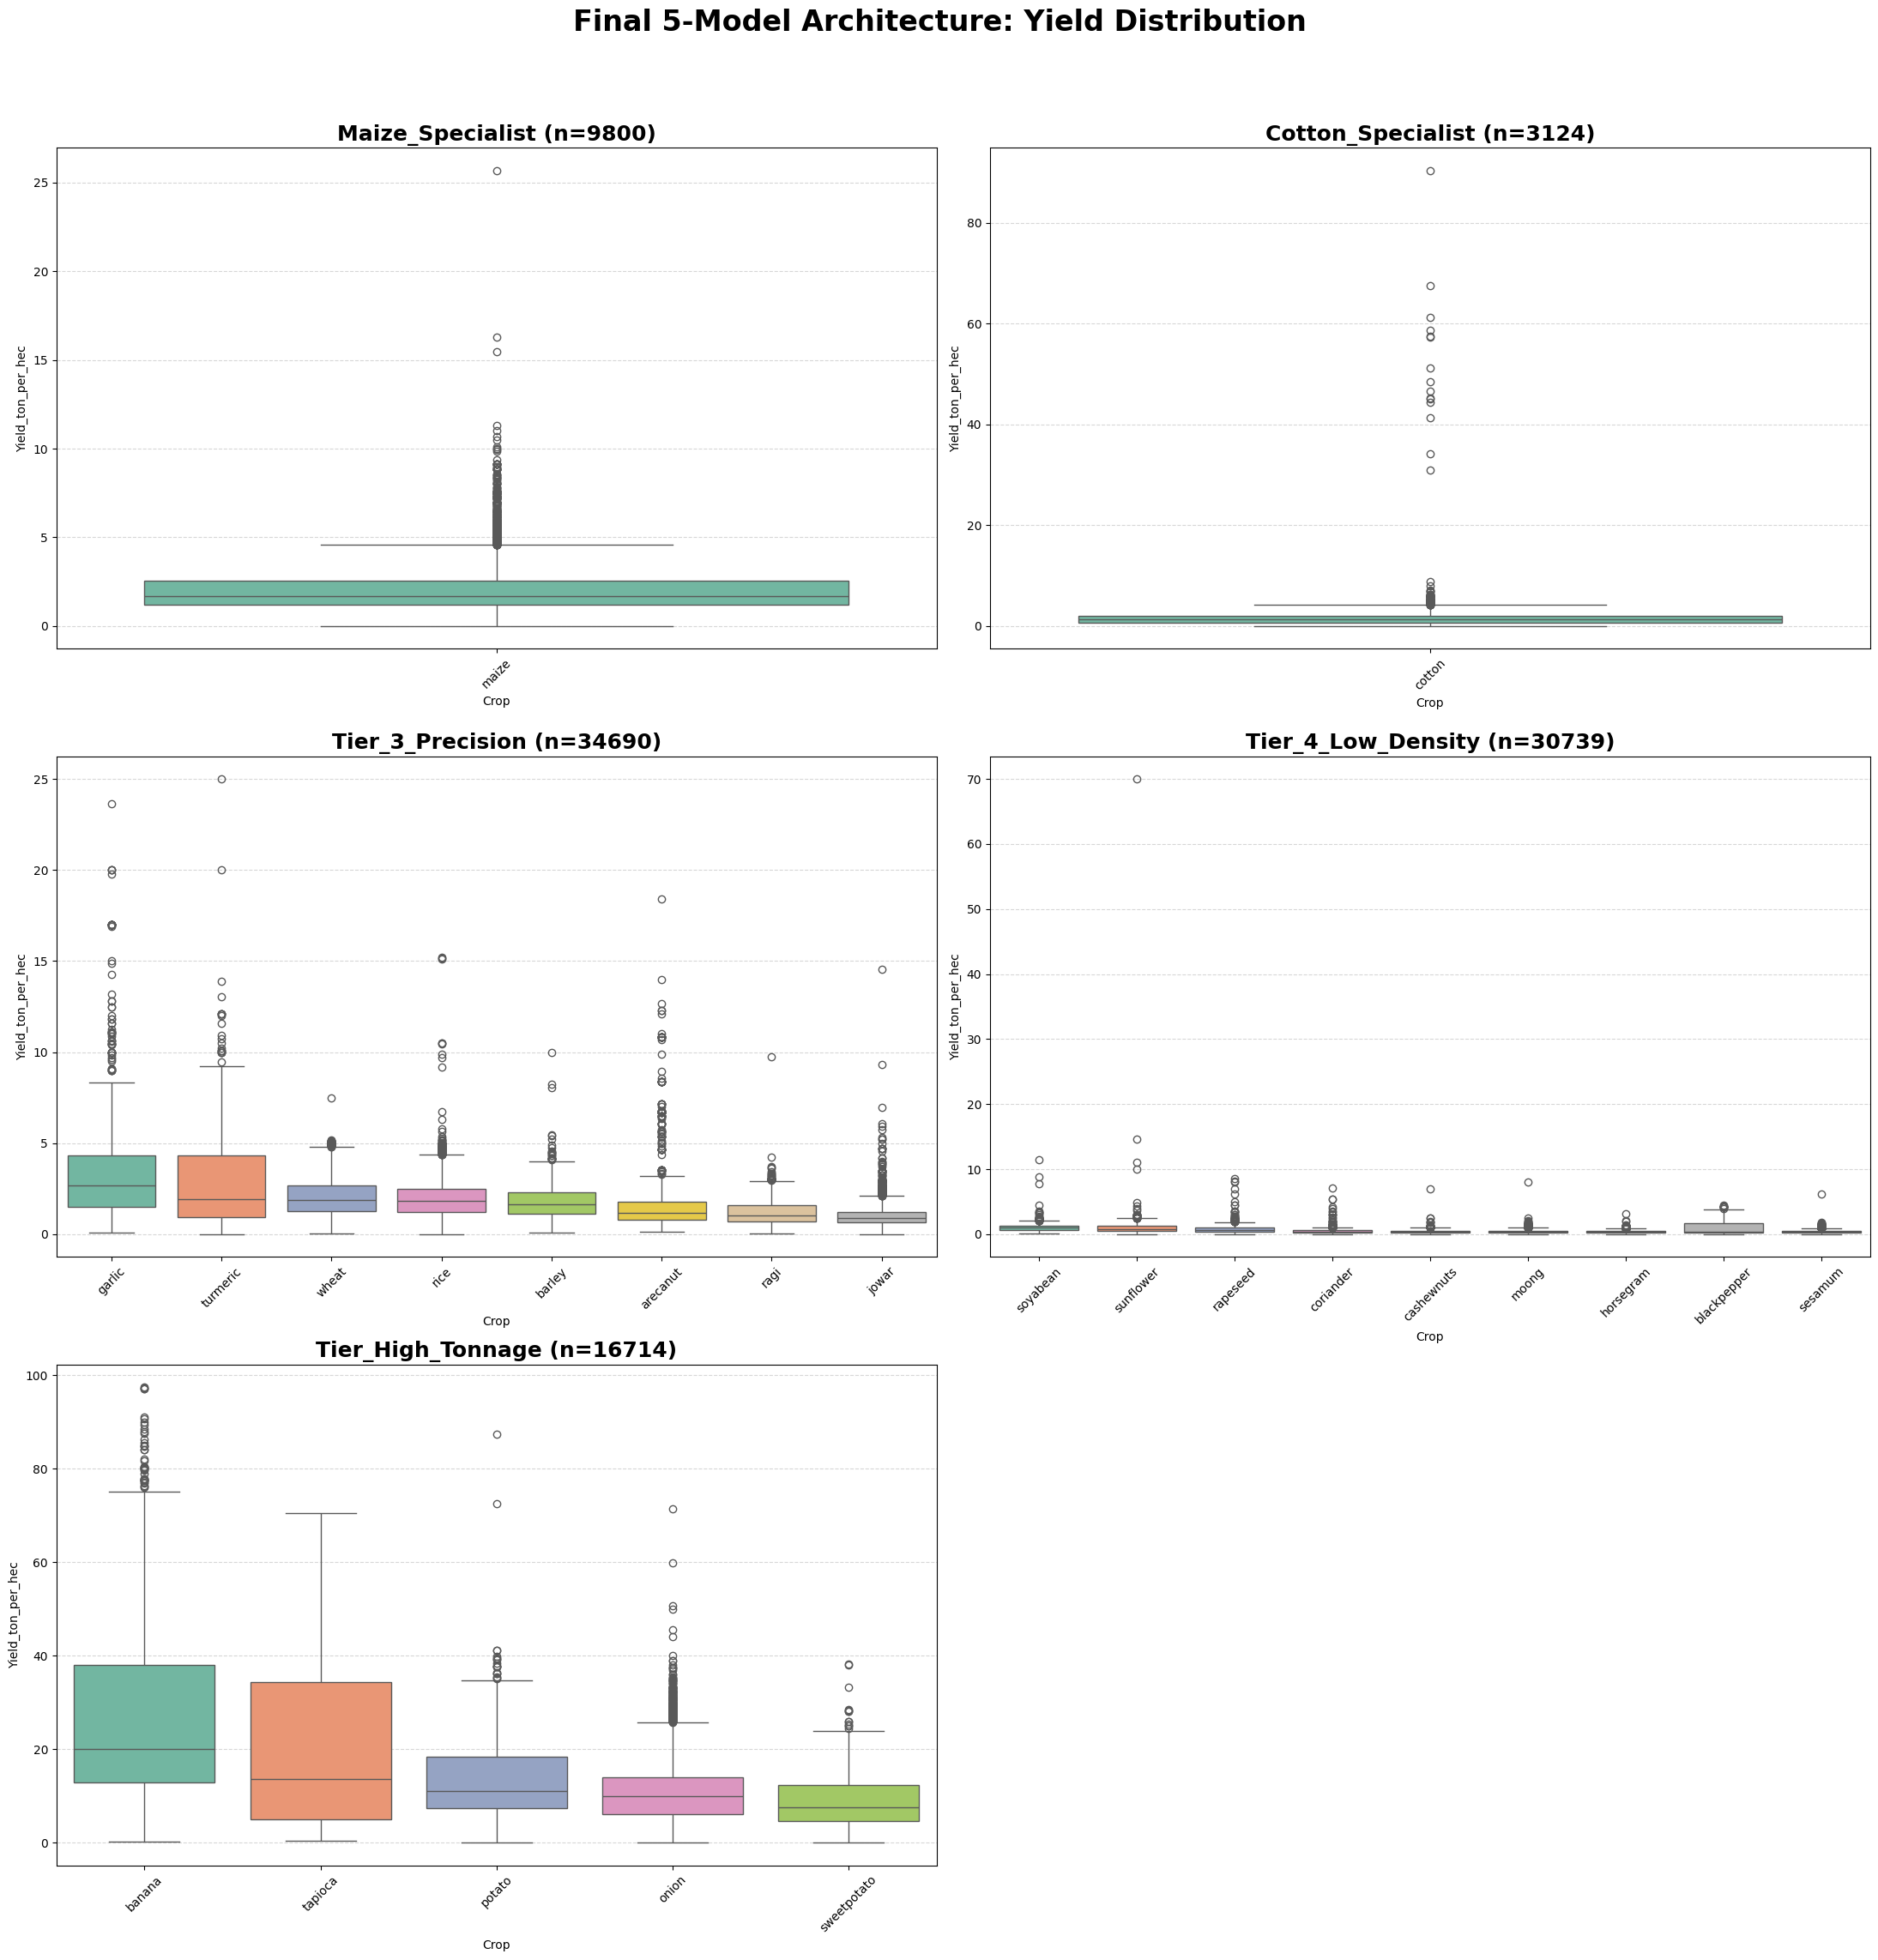

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Define and Create the 5 Optimized Groups
final_crop_groups = {
    "Maize_Specialist": ['maize'],
    "Cotton_Specialist": ['cotton'],
    "Tier_3_Precision": ['wheat', 'rice', 'barley', 'jowar', 'ragi', 'arecanut', 'garlic', 'turmeric'],
    "Tier_4_Low_Density": ['moong', 'sesamum', 'rapeseed', 'soyabean', 'horsegram', 'sunflower', 'coriander', 'cashewnuts', 'blackpepper'],
    "Tier_High_Tonnage": ['banana', 'sugarcane', 'tapioca', 'potato', 'onion', 'sweetpotato']
}

new_specialist_dfs = {}
for group_name, crops in final_crop_groups.items():
    # Use str.lower() to ensure matches regardless of case
    df_group = df_clean[df_clean['Crop'].str.lower().isin(crops)].copy()
    if not df_group.empty:
        new_specialist_dfs[group_name] = df_group

# 2. Safety Check
if not new_specialist_dfs:
    print("❌ ERROR: No data found for the specified groups. Check if df_clean is loaded and crop names match.")
else:
    # 3. Dynamic Grid Calculation
    num_groups = len(new_specialist_dfs)
    cols = 2
    rows = (num_groups + 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(22, 8 * rows))
    fig.suptitle('Final 5-Model Architecture: Yield Distribution', fontsize=24, fontweight='bold')
    
    # Flatten axes for consistent indexing
    ax_flat = axes.flatten() if num_groups > 1 else [axes]

    for i, (name, df) in enumerate(new_specialist_dfs.items()):
        order = df.groupby('Crop')['Yield_ton_per_hec'].median().sort_values(ascending=False).index
        sns.boxplot(x='Crop', y='Yield_ton_per_hec', data=df, ax=ax_flat[i], order=order, palette='Set2')
        ax_flat[i].set_title(f'{name} (n={len(df)})', fontsize=18, fontweight='bold')
        ax_flat[i].tick_params(axis='x', rotation=45)
        ax_flat[i].grid(axis='y', linestyle='--', alpha=0.5)

    # Hide unused plots
    for j in range(i + 1, len(ax_flat)):
        ax_flat[j].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [21]:
import optuna
import joblib
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.base import clone

# Dictionary to store the final tuned parameters
final_best_params = {}

def objective(trial, X_tr, y_tr, X_te, y_te, name):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        # Maize and Cotton get shallower trees to avoid overfitting
        'max_depth': trial.suggest_int('max_depth', 3, 6 if "Specialist" in name else 10),
        'subsample': trial.suggest_float('subsample', 0.6, 0.95),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.95),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 8),
        'random_state': 42,
        'n_jobs': -1
    }
    
    model = XGBRegressor(**param)
    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    return mean_absolute_error(y_te, preds)

# Execute the 5-Model Optimization
for target_group, group_data in final_splits.items():
    print(f"\n🎯 TUNING FINAL MODEL: {target_group}")
    
    # Fresh preprocessor clone for group-specific scaling
    group_preprocessor = clone(preprocessor)
    
    # Pre-transform for speed
    X_train_opt = group_preprocessor.fit_transform(group_data['X_train'])
    X_test_opt = group_preprocessor.transform(group_data['X_test'])
    
    # Run Optuna study
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: objective(trial, X_train_opt, group_data['y_train'], 
                                           X_test_opt, group_data['y_test'], target_group), 
                   n_trials=40)
    
    # Capture results
    final_best_params[target_group] = study.best_params
    print(f"✨ Final {target_group} MAE: {study.best_value:.4f}")

# Save the final parameters
joblib.dump(final_best_params, "final_5_model_params.pkl")

[I 2026-02-14 06:27:03,868] A new study created in memory with name: no-name-f5cdd634-495c-44e4-a224-973c2f80ee66



🎯 TUNING FINAL MODEL: Maize_Specialist


[I 2026-02-14 06:27:04,101] Trial 0 finished with value: 0.5577213100492129 and parameters: {'n_estimators': 753, 'learning_rate': 0.017933407316802524, 'max_depth': 3, 'subsample': 0.69317740634692, 'colsample_bytree': 0.8527760041644501, 'min_child_weight': 1}. Best is trial 0 with value: 0.5577213100492129.
[I 2026-02-14 06:27:04,312] Trial 1 finished with value: 0.5656215860392665 and parameters: {'n_estimators': 595, 'learning_rate': 0.040237835328955016, 'max_depth': 5, 'subsample': 0.9480200849435045, 'colsample_bytree': 0.9199311816711921, 'min_child_weight': 5}. Best is trial 0 with value: 0.5577213100492129.
[I 2026-02-14 06:27:04,453] Trial 2 finished with value: 0.5571654570717822 and parameters: {'n_estimators': 501, 'learning_rate': 0.025532160166958966, 'max_depth': 3, 'subsample': 0.6382357404288848, 'colsample_bytree': 0.6778438435726533, 'min_child_weight': 1}. Best is trial 2 with value: 0.5571654570717822.
[I 2026-02-14 06:27:04,843] Trial 3 finished with value: 0.5

✨ Final Maize_Specialist MAE: 0.5512

🎯 TUNING FINAL MODEL: Cotton_Specialist


[I 2026-02-14 06:27:10,628] Trial 1 finished with value: 1.1802611699884378 and parameters: {'n_estimators': 305, 'learning_rate': 0.01463840137125161, 'max_depth': 5, 'subsample': 0.6369482425245475, 'colsample_bytree': 0.6786323863029686, 'min_child_weight': 2}. Best is trial 0 with value: 1.1801657059397153.
[I 2026-02-14 06:27:10,855] Trial 2 finished with value: 1.2250091903059674 and parameters: {'n_estimators': 581, 'learning_rate': 0.06544382021166426, 'max_depth': 6, 'subsample': 0.7861826835461168, 'colsample_bytree': 0.9449725307908943, 'min_child_weight': 2}. Best is trial 0 with value: 1.1801657059397153.
[I 2026-02-14 06:27:11,074] Trial 3 finished with value: 1.2124135227705974 and parameters: {'n_estimators': 680, 'learning_rate': 0.03274365261110813, 'max_depth': 5, 'subsample': 0.7173287841662774, 'colsample_bytree': 0.8105437689494108, 'min_child_weight': 5}. Best is trial 0 with value: 1.1801657059397153.
[I 2026-02-14 06:27:11,314] Trial 4 finished with value: 1.23

✨ Final Cotton_Specialist MAE: 1.1566

🎯 TUNING FINAL MODEL: Tier_3_Precision


[I 2026-02-14 06:27:16,018] Trial 0 finished with value: 0.4683047418113248 and parameters: {'n_estimators': 809, 'learning_rate': 0.03560169468187174, 'max_depth': 4, 'subsample': 0.6386616284357178, 'colsample_bytree': 0.9447669429123271, 'min_child_weight': 2}. Best is trial 0 with value: 0.4683047418113248.
[I 2026-02-14 06:27:17,337] Trial 1 finished with value: 0.46466569097686644 and parameters: {'n_estimators': 781, 'learning_rate': 0.012652593114750548, 'max_depth': 10, 'subsample': 0.7434030461023203, 'colsample_bytree': 0.602816013489858, 'min_child_weight': 8}. Best is trial 1 with value: 0.46466569097686644.
[I 2026-02-14 06:27:17,936] Trial 2 finished with value: 0.4739582709848592 and parameters: {'n_estimators': 341, 'learning_rate': 0.05630271446742106, 'max_depth': 10, 'subsample': 0.7030379826550546, 'colsample_bytree': 0.6689607401933695, 'min_child_weight': 3}. Best is trial 1 with value: 0.46466569097686644.
[I 2026-02-14 06:27:18,151] Trial 3 finished with value:

✨ Final Tier_3_Precision MAE: 0.4611

🎯 TUNING FINAL MODEL: Tier_4_Low_Density


[I 2026-02-14 06:27:39,836] Trial 0 finished with value: 0.18432550639447562 and parameters: {'n_estimators': 933, 'learning_rate': 0.05108515344068989, 'max_depth': 7, 'subsample': 0.9063214476957278, 'colsample_bytree': 0.7996131740409728, 'min_child_weight': 7}. Best is trial 0 with value: 0.18432550639447562.
[I 2026-02-14 06:27:41,526] Trial 1 finished with value: 0.18987350259090005 and parameters: {'n_estimators': 1177, 'learning_rate': 0.04597447422120766, 'max_depth': 10, 'subsample': 0.9235442026966458, 'colsample_bytree': 0.8743997363575551, 'min_child_weight': 7}. Best is trial 0 with value: 0.18432550639447562.
[I 2026-02-14 06:27:42,559] Trial 2 finished with value: 0.19029847683536383 and parameters: {'n_estimators': 700, 'learning_rate': 0.09549425946964861, 'max_depth': 9, 'subsample': 0.7813911653315739, 'colsample_bytree': 0.7137649454353825, 'min_child_weight': 2}. Best is trial 0 with value: 0.18432550639447562.
[I 2026-02-14 06:27:43,359] Trial 3 finished with val

✨ Final Tier_4_Low_Density MAE: 0.1779

🎯 TUNING FINAL MODEL: Tier_High_Tonnage


[I 2026-02-14 06:28:05,012] Trial 0 finished with value: 3.289685255910372 and parameters: {'n_estimators': 488, 'learning_rate': 0.023993613362902122, 'max_depth': 4, 'subsample': 0.6891884031130859, 'colsample_bytree': 0.7990503566579656, 'min_child_weight': 8}. Best is trial 0 with value: 3.289685255910372.
[I 2026-02-14 06:28:05,314] Trial 1 finished with value: 3.2329901128855782 and parameters: {'n_estimators': 657, 'learning_rate': 0.02012855023991118, 'max_depth': 5, 'subsample': 0.6649535906397429, 'colsample_bytree': 0.8092407158199428, 'min_child_weight': 2}. Best is trial 1 with value: 3.2329901128855782.
[I 2026-02-14 06:28:05,535] Trial 2 finished with value: 3.22767529728372 and parameters: {'n_estimators': 472, 'learning_rate': 0.059967533948717525, 'max_depth': 5, 'subsample': 0.642987595554408, 'colsample_bytree': 0.6403051904058311, 'min_child_weight': 2}. Best is trial 2 with value: 3.22767529728372.
[I 2026-02-14 06:28:05,990] Trial 3 finished with value: 3.2352391

✨ Final Tier_High_Tonnage MAE: 3.2121


['final_5_model_params.pkl']

In [25]:
def check_outlier_impact(df, crop_name):
    # Filter for the specific crop
    crop_df = df[df['Crop'].str.lower() == crop_name.lower()]
    total_rows = len(crop_df)
    
    # Calculate IQR
    Q1 = crop_df['Yield_ton_per_hec'].quantile(0.25)
    Q3 = crop_df['Yield_ton_per_hec'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds (standard boxplot logic)
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = crop_df[crop_df['Yield_ton_per_hec'] > upper_bound]
    outlier_count = len(outliers)
    percentage = (outlier_count / total_rows) * 100
    
    print(f"--- {crop_name.upper()} Analysis ---")
    print(f"Total Rows: {total_rows}")
    print(f"Outlier Count (above {upper_bound:.2f} t/ha): {outlier_count}")
    print(f"Impact: {percentage:.2f}% of data")
    
    return upper_bound

# Check both
maize_bound = check_outlier_impact(df_clean, "maize")
cotton_bound = check_outlier_impact(df_clean, "cotton")

--- MAIZE Analysis ---
Total Rows: 9800
Outlier Count (above 4.58 t/ha): 432
Impact: 4.41% of data
--- COTTON Analysis ---
Total Rows: 3124
Outlier Count (above 4.20 t/ha): 118
Impact: 3.78% of data


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Clean Maize and Cotton (Removing the top ~4% 'trash' data)
df_maize_clean = df_clean[(df_clean['Crop'].str.lower() == 'maize') & (df_clean['Yield_ton_per_hec'] <= 4.58)].copy()
df_cotton_clean = df_clean[(df_clean['Crop'].str.lower() == 'cotton') & (df_clean['Yield_ton_per_hec'] <= 4.20)].copy()

# 2. Define Crop Lists for the 3 Tiers
high_tonnage_crops = ['banana', 'sugarcane', 'tapioca', 'potato', 'onion', 'sweetpotato']
low_density_crops = ['moong', 'sesamum', 'rapeseed', 'soyabean', 'horsegram', 'sunflower', 'coriander', 'cashewnuts', 'blackpepper']
precision_base_crops = ['wheat', 'rice', 'barley', 'jowar', 'ragi', 'arecanut', 'garlic', 'turmeric']

# 3. Build the 3 Final Specialist DataFrames
final_specialist_dfs = {
    "High_Tonnage": df_clean[df_clean['Crop'].str.lower().isin(high_tonnage_crops)].copy(),
    "Low_Density": df_clean[df_clean['Crop'].str.lower().isin(low_density_crops)].copy(),
    "Precision": pd.concat([
        df_clean[df_clean['Crop'].str.lower().isin(precision_base_crops)],
        df_maize_clean,
        df_cotton_clean
    ]).copy()
}

# 4. Perform final Splits
final_all_splits = {}
for name, df_group in final_specialist_dfs.items():
    X = df_group.drop('Yield_ton_per_hec', axis=1)
    y = df_group['Yield_ton_per_hec']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    final_all_splits[name] = {"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test}
    print(f"✅ Created {name}: {len(df_group)} rows")

✅ Created High_Tonnage: 16714 rows
✅ Created Low_Density: 30739 rows
✅ Created Precision: 47064 rows


C:\Users\jains\AppData\Local\Temp\ipykernel_39032\894330781.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\jains\AppData\Local\Temp\ipykernel_39032\894330781.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\jains\AppData\Local\Temp\ipykernel_39032\894330781.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\jains\AppData\Local\Temp\ipykernel_39032\894330781.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_

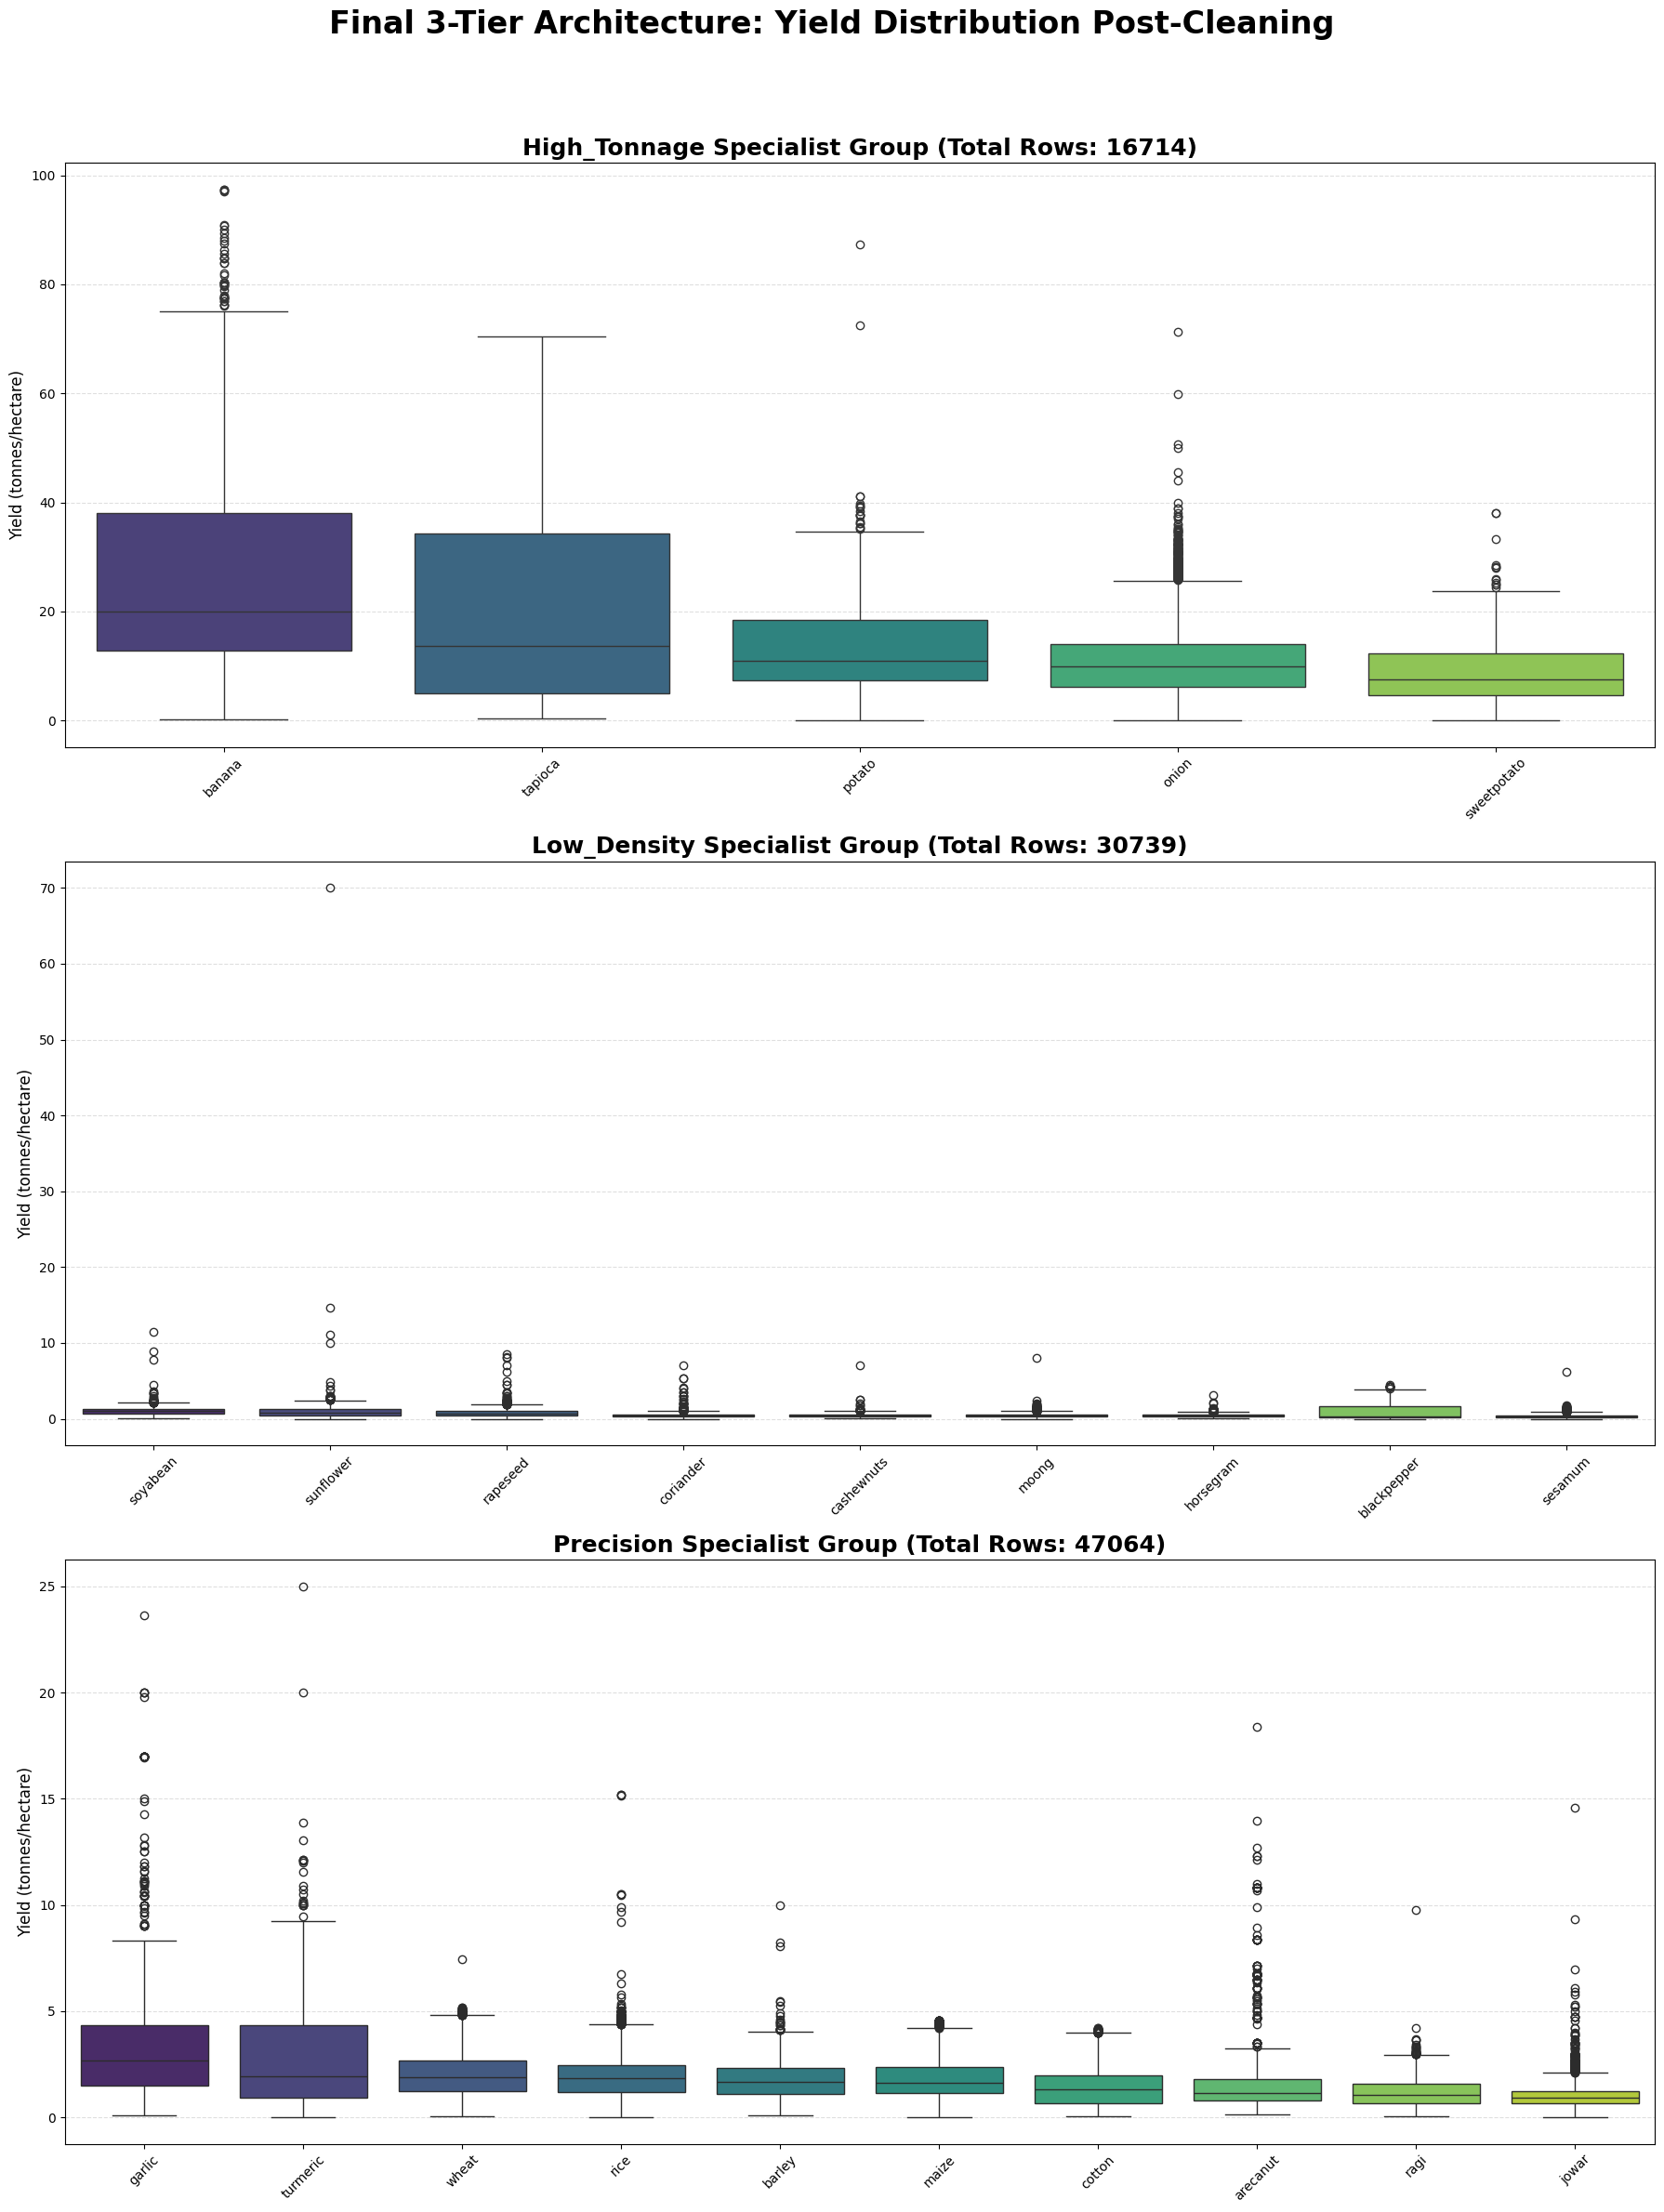

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Setup a 3-row grid (or 2x2 with one hidden)
# Since we have 3 distinct groups, a vertical stack or 2x2 works best.
fig, axes = plt.subplots(3, 1, figsize=(18, 25))
fig.suptitle('Final 3-Tier Architecture: Yield Distribution Post-Cleaning', fontsize=24, fontweight='bold')

# 2. Iterate through our final specialist dictionary
# final_specialist_dfs contains: High_Tonnage, Low_Density, and Precision
for i, (name, df) in enumerate(final_specialist_dfs.items()):
    if df.empty:
        continue
        
    # Sort crops by median for a professional, "Mentor-grade" visualization
    order = df.groupby('Crop')['Yield_ton_per_hec'].median().sort_values(ascending=False).index
    
    sns.boxplot(
        x='Crop', 
        y='Yield_ton_per_hec', 
        data=df, 
        ax=axes[i], 
        order=order,
        palette='viridis' # Using a professional color scale
    )
    
    # Customizing each subplot
    axes[i].set_title(f'{name} Specialist Group (Total Rows: {len(df)})', fontsize=18, fontweight='bold')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Yield (tonnes/hectare)', fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [27]:
import optuna
import joblib
import os
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import mean_absolute_error

# Create folder for models
os.makedirs("production_models", exist_ok=True)

def objective(trial, X_tr, y_tr, X_te, y_te):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'random_state': 42,
        'n_jobs': -1
    }
    model = XGBRegressor(**param)
    model.fit(X_tr, y_tr)
    return mean_absolute_error(y_te, model.predict(X_te))

# The Main Training Execution
for name, data in final_all_splits.items():
    print(f"\n🚀 TUNING & TRAINING: {name}")
    
    # 1. Prepare Data with fresh preprocessor
    group_preprocessor = clone(preprocessor)
    X_train_opt = group_preprocessor.fit_transform(data['X_train'])
    X_test_opt = group_preprocessor.transform(data['X_test'])
    
    # 2. Find Best Hyperparameters
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: objective(trial, X_train_opt, data['y_train'], X_test_opt, data['y_test']), n_trials=30)
    
    # 3. Build and Fit Final Pipeline
    final_pipeline = Pipeline(steps=[
        ('preprocessor', group_preprocessor),
        ('regressor', XGBRegressor(**study.best_params, random_state=42))
    ])
    final_pipeline.fit(data['X_train'], data['y_train'])
    
    # 4. Save to Disk
    joblib.dump(final_pipeline, f"production_models/{name.lower()}_model.pkl")
    print(f"✨ SAVED: {name} model with MAE: {study.best_value:.4f}")

[I 2026-02-14 06:48:21,264] A new study created in memory with name: no-name-e29289c9-3e73-45ba-a62a-4d4395356b15



🚀 TUNING & TRAINING: High_Tonnage


[I 2026-02-14 06:48:21,479] Trial 0 finished with value: 3.2369307915982004 and parameters: {'n_estimators': 345, 'learning_rate': 0.014895784944283808, 'max_depth': 6, 'subsample': 0.8458679212760019, 'colsample_bytree': 0.7594003068368167}. Best is trial 0 with value: 3.2369307915982004.
[I 2026-02-14 06:48:21,886] Trial 1 finished with value: 3.2487959923501073 and parameters: {'n_estimators': 574, 'learning_rate': 0.022161098388974374, 'max_depth': 7, 'subsample': 0.9635409917147142, 'colsample_bytree': 0.9549799571286492}. Best is trial 0 with value: 3.2369307915982004.
[I 2026-02-14 06:48:23,071] Trial 2 finished with value: 3.2920022084428795 and parameters: {'n_estimators': 825, 'learning_rate': 0.011063566302616174, 'max_depth': 10, 'subsample': 0.9245030632377031, 'colsample_bytree': 0.8652422235108119}. Best is trial 0 with value: 3.2369307915982004.
[I 2026-02-14 06:48:23,421] Trial 3 finished with value: 3.21791619078819 and parameters: {'n_estimators': 938, 'learning_rate

✨ SAVED: High_Tonnage model with MAE: 3.2107

🚀 TUNING & TRAINING: Low_Density


[I 2026-02-14 06:48:35,353] Trial 0 finished with value: 0.1775307519690376 and parameters: {'n_estimators': 739, 'learning_rate': 0.08028825177305546, 'max_depth': 4, 'subsample': 0.8319231204816666, 'colsample_bytree': 0.7087294052555166}. Best is trial 0 with value: 0.1775307519690376.
[I 2026-02-14 06:48:36,730] Trial 1 finished with value: 0.1881804560515693 and parameters: {'n_estimators': 745, 'learning_rate': 0.0349983798509085, 'max_depth': 9, 'subsample': 0.9075695097230089, 'colsample_bytree': 0.8952258057957461}. Best is trial 0 with value: 0.1775307519690376.
[I 2026-02-14 06:48:38,040] Trial 2 finished with value: 0.1907321602949626 and parameters: {'n_estimators': 699, 'learning_rate': 0.09696878260786006, 'max_depth': 9, 'subsample': 0.7614739221160747, 'colsample_bytree': 0.8628703063214885}. Best is trial 0 with value: 0.1775307519690376.
[I 2026-02-14 06:48:38,854] Trial 3 finished with value: 0.180896331906728 and parameters: {'n_estimators': 513, 'learning_rate': 0

✨ SAVED: Low_Density model with MAE: 0.1775

🚀 TUNING & TRAINING: Precision


[I 2026-02-14 06:48:58,157] Trial 0 finished with value: 0.4898062481586441 and parameters: {'n_estimators': 954, 'learning_rate': 0.029019190216240314, 'max_depth': 10, 'subsample': 0.9620928694046469, 'colsample_bytree': 0.9042929355308074}. Best is trial 0 with value: 0.4898062481586441.
[I 2026-02-14 06:48:58,571] Trial 1 finished with value: 0.47120343711533985 and parameters: {'n_estimators': 591, 'learning_rate': 0.07655726745147379, 'max_depth': 5, 'subsample': 0.9816577857432348, 'colsample_bytree': 0.7187699396385367}. Best is trial 1 with value: 0.47120343711533985.
[I 2026-02-14 06:48:59,966] Trial 2 finished with value: 0.48597462525594726 and parameters: {'n_estimators': 982, 'learning_rate': 0.08293787526627214, 'max_depth': 8, 'subsample': 0.8182520124429458, 'colsample_bytree': 0.8848713088527232}. Best is trial 1 with value: 0.47120343711533985.
[I 2026-02-14 06:49:00,377] Trial 3 finished with value: 0.4750266359861916 and parameters: {'n_estimators': 319, 'learning_

✨ SAVED: Precision model with MAE: 0.4712


In [ ]:
df_clean['yei']

NameError: name 'df_clean' is not defined